In [1]:
# Import the required modules; copied some code from our class BOOOOTH_Does_Wine teaching as much code is standard and can be reused.
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id") #makes standard scaler easier

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
scaled_data = scaler.transform(df_market_data)
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Set the coinid column as index
df_scaled.index = df_market_data.index 

#best practice - reset the index so coin_id is a column
#df_scaled = df_scaled.reset_index()

# Display sample data
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Do Unsupervised Clustering

# KMeans on SCALED (not PCA) DATA

# Define your "X" - features to predict
X = df_scaled

In [8]:
# Used more code from class as we had silhouettes and variance ratio as well.  (I marked code as code I'd use for exact instructions)
# The silhouesttes and variance can be used for other ways to evaluate supervised models.
# I left the homework not required code in so that I could update this assignment later for future evaluation.

# Create a list with the number of k-values from 1 to 11
# Create a a list to store inertia values
inertia = [] 
silhouettes = [] #Extra code not required for homework
cha_chas = [] #Extra code not required for homework

# Create a for loop to compute the inertia with each possible value of k.  
# k=1 breaks the silhouette score metric. Since the addition of silhouettes used 2,12 vs 1,11.
k = list(range(2, 12))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
for i in k:
    #  1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds) #extra code not required for homework
    silhouettes.append(score) #extra code not required for homework
    
    cha_cha = calinski_harabasz_score(X, preds) #extra code not required for homework
    cha_chas.append(cha_cha) #extra code not required for homework
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [9]:
# Define a DataFrame to hold the values for k and the corresponding inertia
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas} # silhouette_score and char_score not required for homework
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff() #acceleration not required for homework

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,195.820218,0.651576,18.159573,NaN
1,3,123.190482,0.702822,25.264783,-72.629736
2,4,79.022435,0.314482,32.459853,-44.168046
3,5,63.858668,0.329023,31.448698,-15.163768
4,6,53.057788,0.287883,30.864375,-10.800879
5,7,44.406791,0.290874,30.956861,-8.650998
6,8,37.078233,0.205692,31.776126,-7.328557
7,9,32.832187,0.258600,30.965687,-4.246046
8,10,28.165433,0.244422,31.653739,-4.666754
9,11,24.964638,0.229807,31.488784,-3.200795


In [10]:
df_elbow1 = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow1.head(20)

,k,inertia,silhouette_score,cha_score
0,2,195.820218,0.651576,18.159573
1,3,123.190482,0.702822,25.264783
2,4,79.022435,0.314482,32.459853
3,5,63.858668,0.329023,31.448698
4,6,53.057788,0.287883,30.864375
5,7,44.406791,0.290874,30.956861
6,8,37.078233,0.205692,31.776126
7,9,32.832187,0.258600,30.965687
8,10,28.165433,0.244422,31.653739
9,11,24.964638,0.229807,31.488784


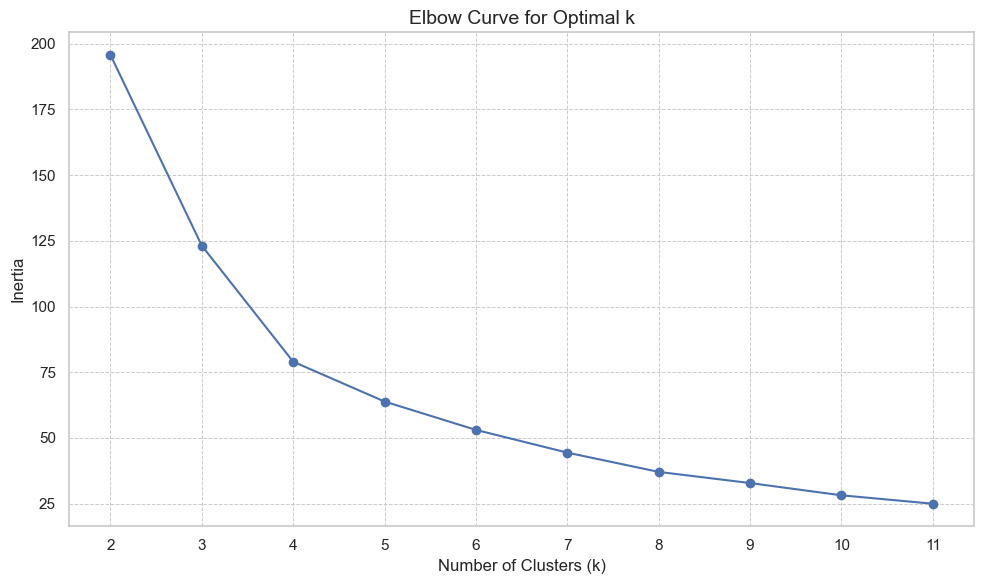

In [11]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Use Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-', color='b')

# Grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Title and Labels
plt.title("Elbow Curve for Optimal k", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

# x-ticks to show integer values clearly
plt.xticks(df_elbow["k"])

# Display the plot
plt.tight_layout()
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`? Very smooth (soft) curve.  There is a higher change at around 4.

**Answer:** Very smooth (soft) curve.  There highest variance ration criterion at 4. Silhouette score as well helped with this determination.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [12]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [13]:
# Fit the K-Means model using the scaled data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [14]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [15]:
# Create a copy of the DataFrame
df_scaled2 = df_scaled.copy()

In [16]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled2 = df_scaled.copy()
df_scaled2['clusters'] = preds

# Display sample data
df_scaled2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [17]:
# Create the scatter plot with hvPlot
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Plot the clusters
scatter_plot = df_scaled2.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='clusters',         # Color by cluster
    cmap='viridis',       # Color map
    hover_cols=['crypto_name'],  # Display cryptocurrency names on hover
    title='Price Change: 24h vs 7 Day',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)',
    width=800,
    height=600
)

# Display the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters)

---

### Optimize Clusters with Principal Component Analysis.

In [18]:
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


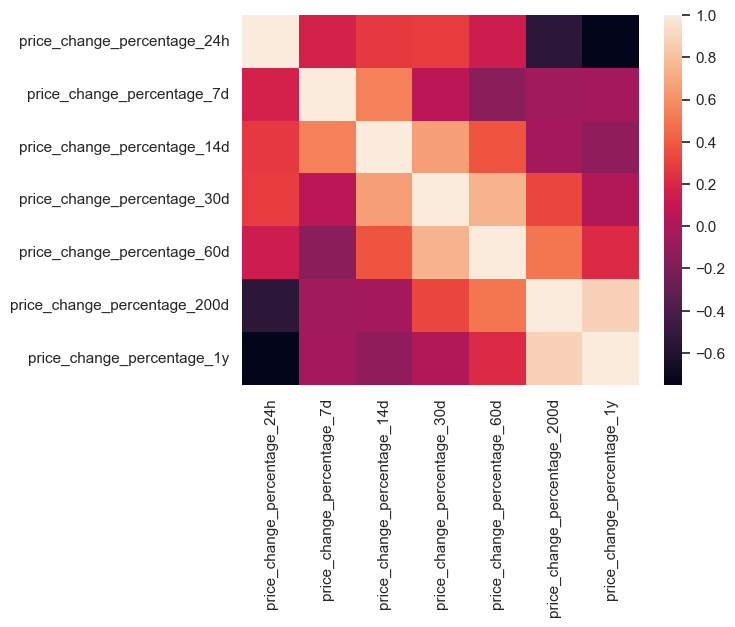

In [19]:
sns.heatmap(corrs)
plt.show()

In [20]:
# Create a PCA model instance and set `n_components=3`.
# We have multi-collinearity (we are afflicted)

# Init
n_components = len(df_scaled2.columns)
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed crypto currency DataFrame
pca_data = pca.fit_transform(df_scaled2)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled2.index

df_pca.head()


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
coin_id,,,,,,,,
bitcoin,0.448908,-1.245376,-0.850640,-0.091811,-0.217204,-0.621216,-0.189577,0.056556
ethereum,0.495367,-0.899823,-1.317559,0.101328,-0.085889,-0.356636,0.055473,0.142213
tether,-0.818846,0.071899,0.695015,-0.469133,0.124268,0.027870,-0.131126,-0.095639
ripple,-0.840357,0.080054,0.544360,-0.739370,-0.102744,0.186862,-0.284470,0.118443
bitcoin-cash,0.813240,-2.669520,-1.643321,0.216166,-0.080863,0.330944,-0.427449,-0.086271


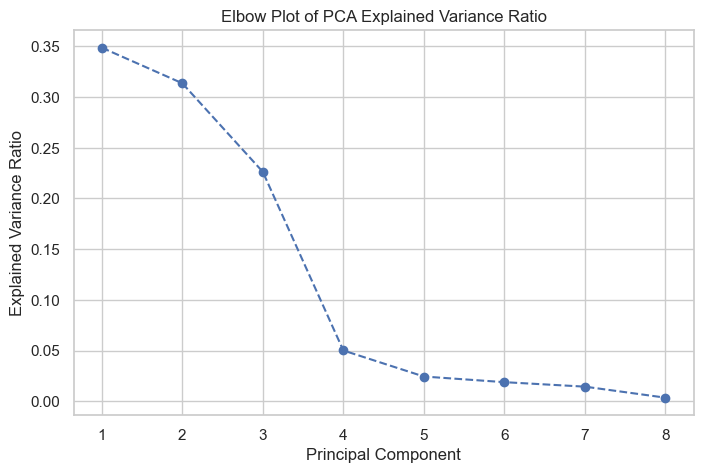

In [21]:
# See if dimensionality reduction will help

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [22]:
explained_variance_ratio

array([0.34871677, 0.31363391, 0.22627118, 0.05010259, 0.02442552,
       0.01885711, 0.01443333, 0.0035596 ])

In [23]:
sum(explained_variance_ratio[0:3]) #explains almost 90% of variance

0.8886218549859446

In [24]:
# Create a PCA model instance and set `n_components=3`.
# Init
n_components = 3
pca=PCA(n_components=n_components)

# Fit the PCA model on the transformed crypto currency DataFrame
pca_data = pca.fit_transform(df_scaled2)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca.index = df_scaled2.index

df_pca.head(5)


,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321


In [25]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
sum(pca.explained_variance_ratio_)

0.8886218549859446

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:88.9%

In [26]:
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321


---

### Find the Best Value for k Using the PCA Data

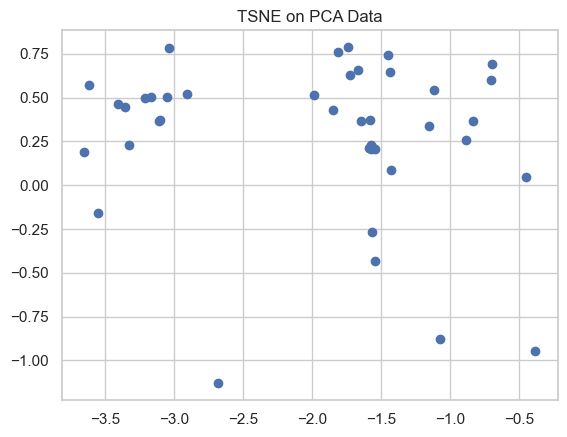

In [27]:
# Can this even be clustered?
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_pca)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on PCA Data")
plt.show()

In [28]:
# Do Unsupervised Clustering

# KMeans on PCA) DATA

# Define your "X" - features to predict
X = df_pca

In [29]:
#PCA DATA
# Used more code from class as we had silhouettes and variance ratio as well.  (I marked code as code I'd use for exact instructions)
# The silhouesttes and variance can be used for other ways to evaluate supervised models.
# I left the homework not required code in so that I could update this assignment later for future evaluation.

# Create a list with the number of k-values from 1 to 11
# Create a a list to store inertia values
inertia = [] 
silhouettes = [] #Extra code not required for homework
cha_chas = [] #Extra code not required for homework

# Create a for loop to compute the inertia with each possible value of k.  
# k=1 breaks the silhouette score metric. Since the addition of silhouettes used 2,12 vs 1,11.
k = list(range(2, 12))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
for i in k:
    #  1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    
    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(X)
    
    # predict the model
    preds = k_model.predict(X)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)
    score = silhouette_score(X, preds) #extra code not required for homework
    silhouettes.append(score) #extra code not required for homework
    
    cha_cha = calinski_harabasz_score(X, preds) #extra code not required for homework
    cha_chas.append(cha_cha) #extra code not required for homework
    
    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [30]:
# Define a DataFrame to hold the values for k and the corresponding inertia
# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "cha_score": cha_chas} # silhouette_score and char_score not required for homework
df_elbow = pd.DataFrame(elbow_data)

df_elbow["acc"] = df_elbow.inertia.diff() #acceleration not required for homework

# Review the DataFrame
df_elbow.head(20)

,k,inertia,silhouette_score,cha_score,acc
0,2,203.579726,0.511665,16.674921,NaN
1,3,112.854846,0.550075,29.928614,-90.724880
2,4,44.130602,0.579159,68.888005,-68.724244
3,5,33.217427,0.571879,69.741927,-10.913175
4,6,23.371677,0.502275,80.043770,-9.845751
5,7,17.172200,0.464405,90.236125,-6.199477
6,8,13.593411,0.480809,96.075606,-3.578789
7,9,11.155098,0.472573,100.211613,-2.438313
8,10,8.958913,0.420993,108.291619,-2.196185
9,11,7.345260,0.355915,115.698049,-1.613653


In [31]:
df_elbow2 = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow2.head(20)

,k,inertia,silhouette_score,cha_score
0,2,203.579726,0.511665,16.674921
1,3,112.854846,0.550075,29.928614
2,4,44.130602,0.579159,68.888005
3,5,33.217427,0.571879,69.741927
4,6,23.371677,0.502275,80.043770
5,7,17.172200,0.464405,90.236125
6,8,13.593411,0.480809,96.075606
7,9,11.155098,0.472573,100.211613
8,10,8.958913,0.420993,108.291619
9,11,7.345260,0.355915,115.698049


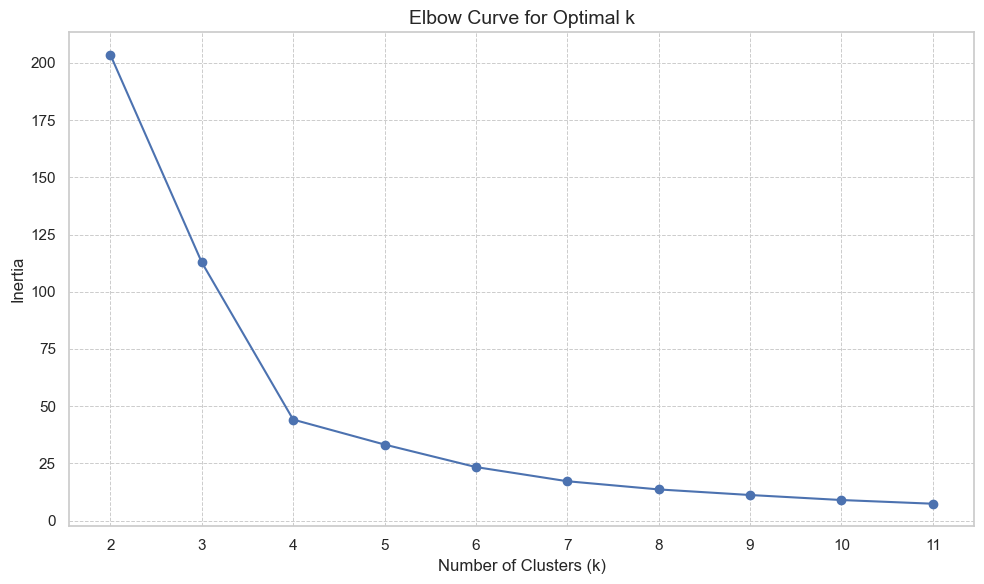

In [30]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Use Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o', linestyle='-', color='b')

# Grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Title and Labels
plt.title("Elbow Curve for Optimal k", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

# x-ticks to show integer values clearly
plt.xticks(df_elbow["k"])

# Display the plot
plt.tight_layout()
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer: It doesn't differ.  However, PCA shows a slightly sharper curve

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [44]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [45]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [46]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [47]:
# Create a copy of the DataFrame with the PCA data
df_scaled3 = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_scaled3['clusters'] = preds

# Display sample data
df_scaled3.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1


In [50]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

# Create the scatter plot with hvPlot
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
# Plot the clusters
scatter_plot = df_scaled3.hvplot.scatter(
    x='PCA_1',
    y='PCA_2',
    c='clusters',         # Color by cluster
    cmap='viridis',       # Color map
    hover_cols=['crypto_name'],  # Display cryptocurrency names on hover
    title='PCA1 VS PCA2',
    xlabel='PCA1',
    ylabel='PCA2',
    width=800,
    height=600
)

# Display the plot
scatter_plot

:Scatter   [PCA_1]   (PCA_2,clusters)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

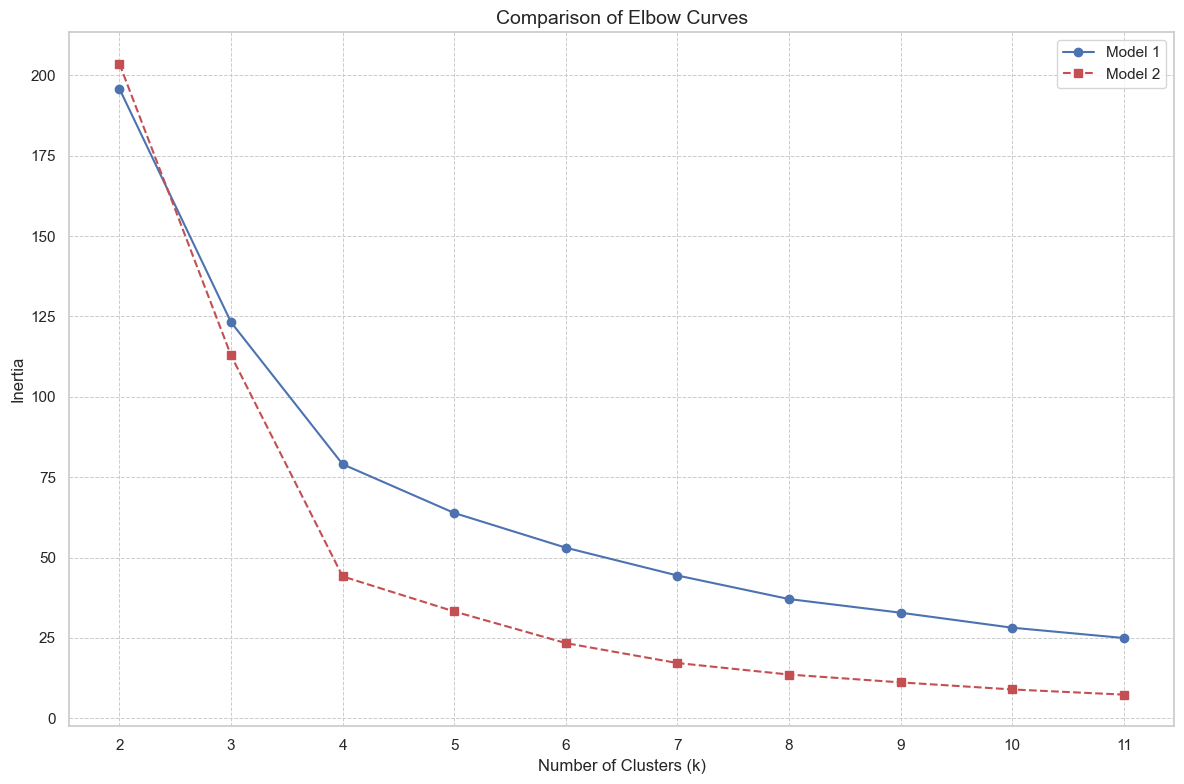

In [32]:
# Use Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Plot the elbow curves
plt.figure(figsize=(12, 8))

# Plot the first elbow curve
plt.plot(df_elbow1["k"], df_elbow1["inertia"], marker='o', linestyle='-', color='b', label='Model 1')

# Plot the second elbow curve
plt.plot(df_elbow2["k"], df_elbow2["inertia"], marker='s', linestyle='--', color='r', label='Model 2')

# Add grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Add title and labels
plt.title("Comparison of Elbow Curves", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Inertia", fontsize=12)

# Add a legend to distinguish between the curves
plt.legend()

# Customize x-ticks
plt.xticks(df_elbow1["k"])

# Show the plot
plt.tight_layout()
plt.show()


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** You can see the PCA_Data shows a stronger curve at 4.  PCA simplifies the data which makes it easier to visualize.  By simplifying the data, we get less noise and minimization of irrelevant information which shows more meaningful clusters.  PCA data helps to emphasize the directions in the variances of data.  Fewer features minimizes overfitting as well.  There are some trade-offs when making a decision to use less features.  The loss of data is a consideration.  Fewer features can make visualizatation easier.